# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=15eGnAbma5Q_j9CZZKi46Gh3-EpgSWYOV"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Classifying disease using Deep Learning 
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=19BuQ5m0xZWC7vQN4jX9lukmJ4aE0EkL8)

![alt text](https://drive.google.com/uc?id=10tbeSkGZ0xdHtqTGhYwHhb9PPURw0BfD)

# TASK #2: IMPORT LIBRARIES AND DATASET

In [35]:
# This is a custom dataset that contains covid-19 x-ray images, viral pneumonia x-ray images, bacterial pneumonia x-ray iamges and normal person x-ray images.
# Each class contains 133 images.
# Dataset Source:
# https://github.com/ieee8023/covid-chestxray-dataset 
# https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia


import os
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()


In [3]:
# Specify training data directory
X_Ray_Dir = 'Dataset/'

In [4]:
# List the folders in the directory
os.listdir(X_Ray_Dir)

['0', '1', '2', '3']

In [5]:
# Use image generator to generate tensor images data and normalize them
# Use 20% of the data for cross-validation  
image_generator = ImageDataGenerator(rescale=1./255,validation_split= 0.2)

In [6]:
# Generate batches of 40 images
# Total number of images is 133*4 = 532 images
# Training is 428 (80%) and validation is 104 (20%)
# Perform shuffling and image resizing
train_generator = image_generator.flow_from_directory(batch_size= 40, directory=X_Ray_Dir,shuffle=True,target_size=(256,256),class_mode='categorical',subset='training')


Found 428 images belonging to 4 classes.


In [7]:
validation_generator = image_generator.flow_from_directory(batch_size= 40, directory=X_Ray_Dir,shuffle=True,target_size=(256,256),class_mode='categorical',subset='validation')

Found 104 images belonging to 4 classes.


In [8]:
# Generate a batch of 40 images and labels
train_images, train_label = next(train_generator)

In [9]:
train_images.shape

(40, 256, 256, 3)

In [10]:
train_label.shape

(40, 4)

In [11]:
train_label

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]],

In [12]:
# labels Translator 
label_name = {0:'Covid-19',1:'Normal',2:'Viral Pneumonia',3:'Bacterial Pneumonia'}

# TASK #3: VISUALIZE DATASET

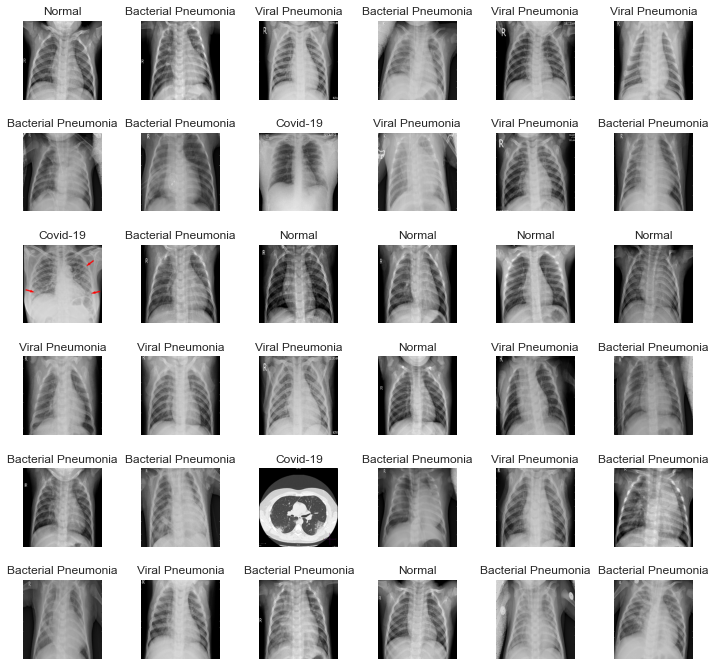

In [36]:
L = 6 
W = 6 
fig, axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0,W*L):
    axes[i].imshow(train_images[i])
    axes[i].set_title(label_name[np.argmax(train_label[i])])
    axes[i].axis('off')
plt.subplots_adjust(wspace = 0.5)


# TASK #4: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS

![alt text](https://drive.google.com/uc?id=176TJGdJtNZmX4J5QyeI8W_YS5f1gg5VS)

![alt text](https://drive.google.com/uc?id=1340UvqbXc-sy6cIuVg7ZbOwcga2JxfkP)

![alt text](https://drive.google.com/uc?id=1hngDlUf9JnwUhPII-Ah7KTtcvoeTI9m8)

![alt text](https://drive.google.com/uc?id=1nt8iX7H2LEhaWgGCi_NIb05DMQEoJVfI)

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND TRANSFER LEARNING

![alt text](https://drive.google.com/uc?id=1Wnti2DSmA2qMRsgkD7Z_MJkmed0bJZTN)

![alt text](https://drive.google.com/uc?id=1Chdq0gdnHGYDDb50pMMtcTOZMr0u37Iz)

![alt text](https://drive.google.com/uc?id=14niGb232X6l8OD1dMT4a_u3fjh_jKuMS)

![alt text](https://drive.google.com/uc?id=1dye4zWALCDu8a1a-58HfZk4On4nVuizV)

# TASK #6: IMPORT MODEL WITH PRETRAINED WEIGHTS

In [14]:
basemodel = ResNet50(weights ='imagenet',include_top = False, input_tensor =Input(shape = (256,256,3)))

In [17]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [16]:
# freezing layers in the model
for layer in basemodel.layers[:-10]:
    layers.trainable = False

# TASK #7: BUILD AND TRAIN DEEP LEARNING MODEL

In [25]:
headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size=(4,4))(headmodel)
headmodel = Flatten(name = 'flatten') (headmodel)
headmodel = Dense(512, activation='relu') (headmodel)
headmodel = Dropout(0.3) (headmodel)
headmodel = Dense(256, activation='relu') (headmodel)
headmodel = Dropout(0.3) (headmodel)
headmodel = Dense(128, activation='relu') (headmodel)
headmodel = Dropout(0.2) (headmodel)
headmodel = Dense(4, activation='softmax') (headmodel)

In [26]:
model = Model(inputs = basemodel.input, outputs = headmodel)

In [27]:
model.compile(loss = 'categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['accuracy'])

In [28]:
# using early stopping to exit training if validation loss is not decreasing after certain number of epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss',mode='min',patience=30)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath='weights.hdf5',verbose=1,save_best_only=True)

In [29]:
train_generator = image_generator.flow_from_directory(batch_size=4,directory=X_Ray_Dir,shuffle=True,target_size=(256,256),class_mode='categorical',subset='training')
val_generator = image_generator.flow_from_directory(batch_size=4,directory=X_Ray_Dir,shuffle=True,target_size=(256,256),class_mode='categorical',subset='validation')

Found 428 images belonging to 4 classes.
Found 104 images belonging to 4 classes.


In [31]:
history = model.fit_generator(train_generator,epochs=25,validation_data=val_generator,callbacks=[checkpointer,earlystopping])

Epoch 1/25


C:\Users\chris\AppData\Local\Temp/ipykernel_26908/685172440.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,epochs=25,validation_data=val_generator,callbacks=[checkpointer,earlystopping])


107/107 [==============================] - ETA: 0s - loss: 0.3663 - accuracy: 0.8621
Epoch 1: val_loss improved from inf to 9.90325, saving model to weights.hdf5
107/107 [==============================] - 15s 144ms/step - loss: 0.3663 - accuracy: 0.8621 - val_loss: 9.9033 - val_accuracy: 0.2500
Epoch 2/25
107/107 [==============================] - ETA: 0s - loss: 0.1769 - accuracy: 0.9463
Epoch 2: val_loss improved from 9.90325 to 8.53970, saving model to weights.hdf5
107/107 [==============================] - 14s 132ms/step - loss: 0.1769 - accuracy: 0.9463 - val_loss: 8.5397 - val_accuracy: 0.3750
Epoch 3/25
107/107 [==============================] - ETA: 0s - loss: 0.1338 - accuracy: 0.9720
Epoch 3: val_loss improved from 8.53970 to 6.52674, saving model to weights.hdf5
107/107 [==============================] - 14s 131ms/step - loss: 0.1338 - accuracy: 0.9720 - val_loss: 6.5267 - val_accuracy: 0.4615
Epoch 4/25
107/107 [==============================] - ETA: 0s - loss: 0.0612 - acc

# TASK #8: EVALUATE TRAINED DEEP LEARNING MODEL

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0, 0.5, 'Precisión y error')

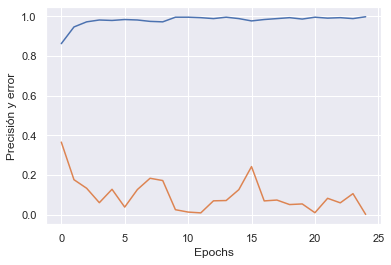

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Precisión y error')

Text(0, 0.5, 'Error en la validación')

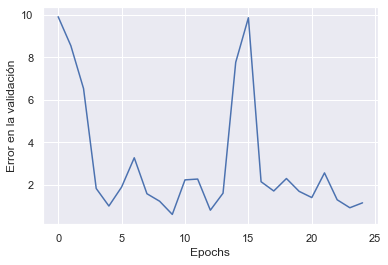

In [39]:
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Error en la validación')

Text(0, 0.5, 'Precisión en la validación')

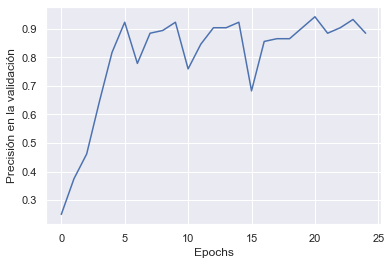

In [41]:
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Precisión en la validación')

In [42]:
test_dir = 'Test'

In [46]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_directory(batch_size=40,directory = test_dir,shuffle = True,target_size=(256,256),class_mode='categorical')
evaluate = model.evaluate_generator(test_generator,steps=test_generator.n//4,verbose=1)
print('Accuracy Test : {}'.format(evaluate[1]))

Found 40 images belonging to 4 classes.


C:\Users\chris\AppData\Local\Temp/ipykernel_26908/4110029526.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  evaluate = model.evaluate_generator(test_generator,steps=test_generator.n//4,verbose=1)


10/10 [==============================] - 2s 6ms/step - loss: 3.2400 - accuracy: 0.8250
Accuracy Test : 0.824999988079071


In [48]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

prediction = []
original = []
image = []

for i in range(len(os.listdir(test_dir))):
    for item in os.listdir(os.path.join(test_dir,str(i))):
        img = cv2.imread(os.path.join(test_dir,str(i),item))
        img = cv2.resize(img,(256,256))
        image.append(img)
        img = img/255
        img = img.reshape(-1,256,256,3)
        predict = model.predict(img)
        predict = np.argmax(predict)
        prediction.append(predict)
        original.append(i)

In [49]:
score = accuracy_score(original,prediction)
print('Test accuracy: {}'.format(score))

Test accuracy: 0.825


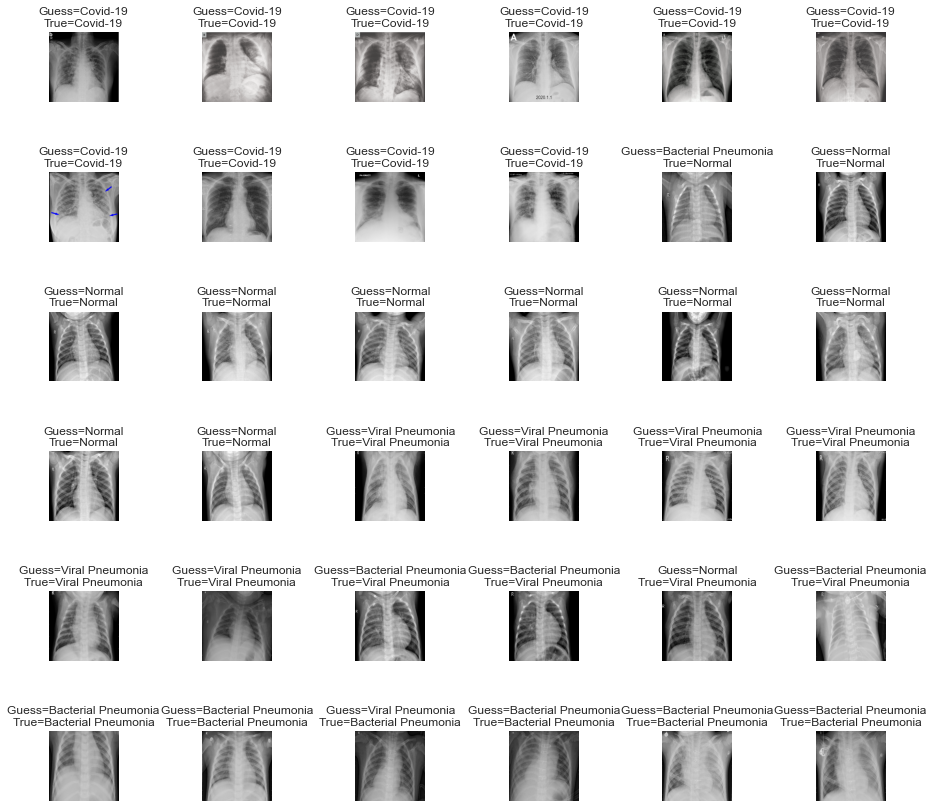

In [53]:
L = 6 
W = 6 
fig, axes = plt.subplots(L,W,figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0,W*L):
    axes[i].imshow(image[i])
    axes[i].set_title('Guess={}\nTrue={}'.format(str(label_name[prediction[i]]),str(label_name[original[i]])))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1.2)


In [54]:
print(classification_report(np.asarray(original),np.asarray(prediction)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.86      0.60      0.71        10
           3       0.67      0.80      0.73        10

    accuracy                           0.82        40
   macro avg       0.84      0.82      0.82        40
weighted avg       0.84      0.82      0.82        40



Text(0.5, 1.0, 'Confusion_matrix')

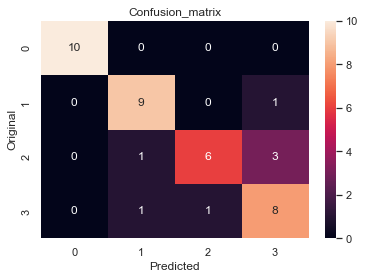

In [56]:
cm = confusion_matrix(np.asarray(original),np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')


# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS